<ipython-input-1-ebb8227a5c12>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  se

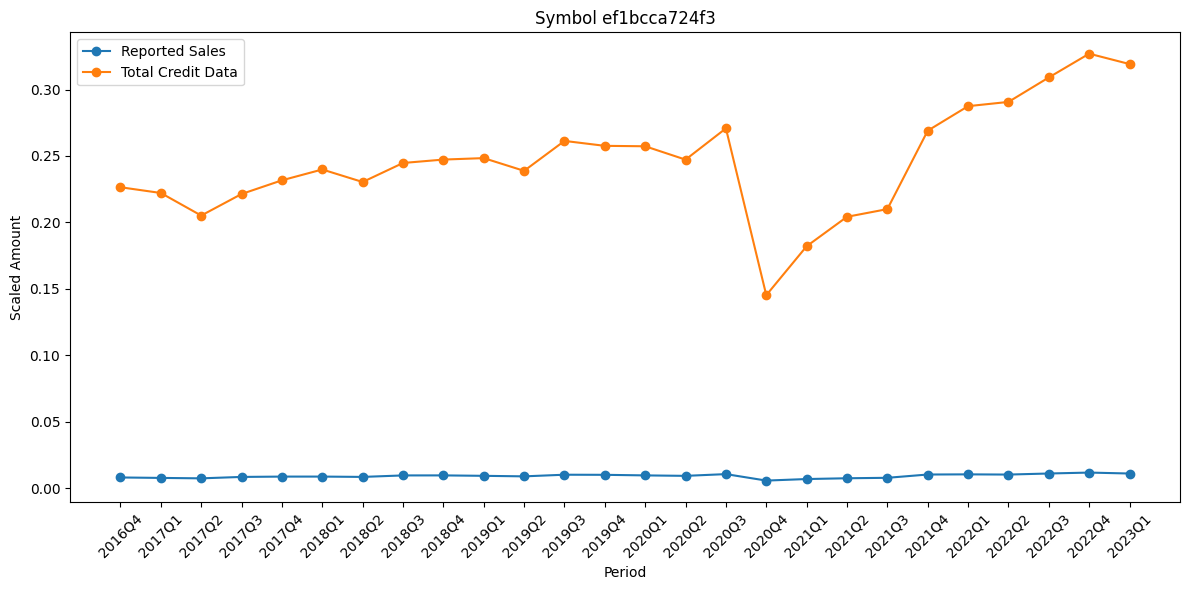

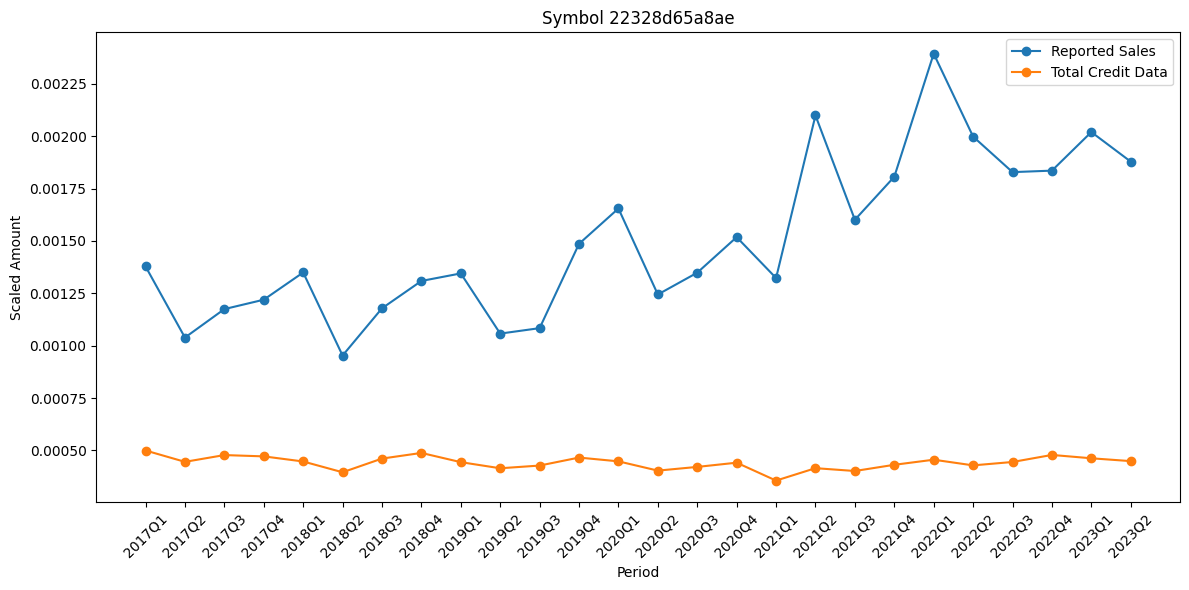

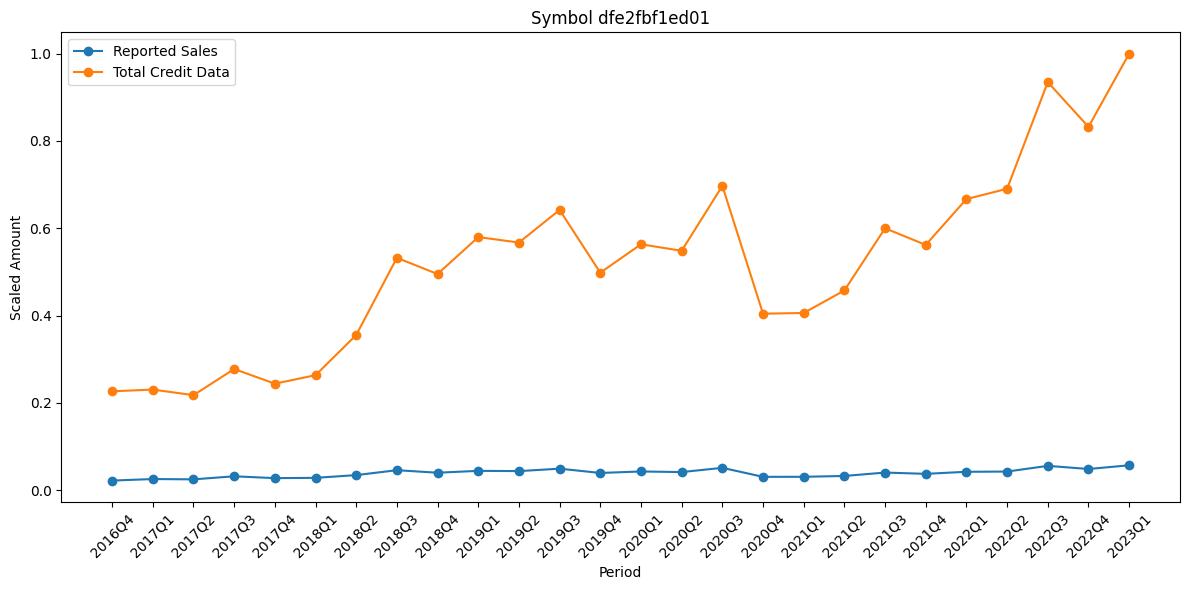

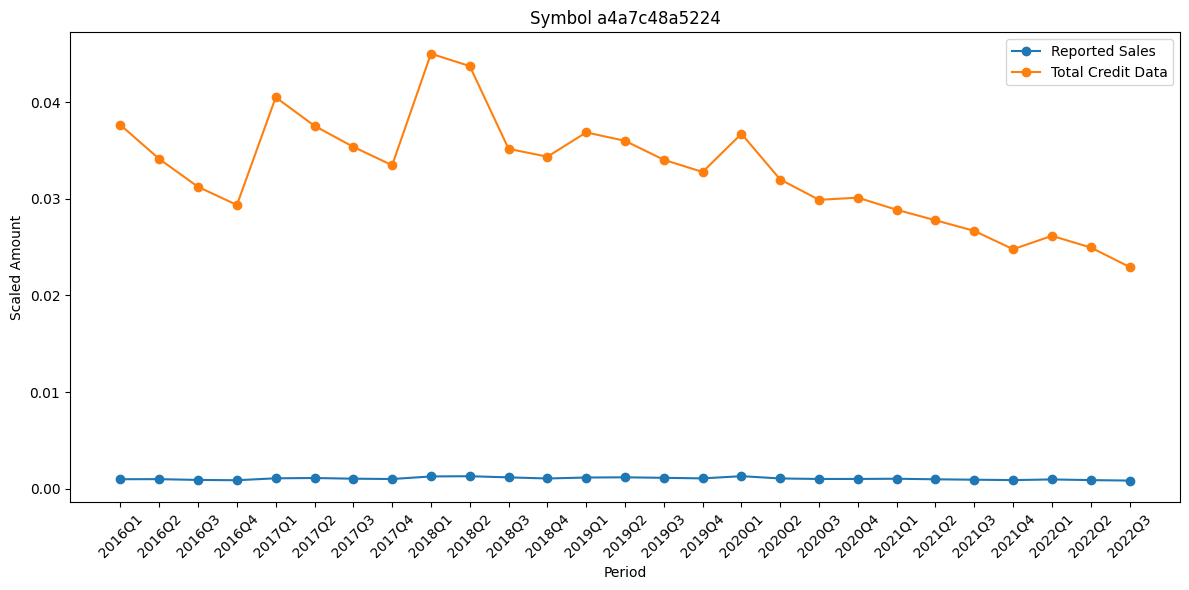

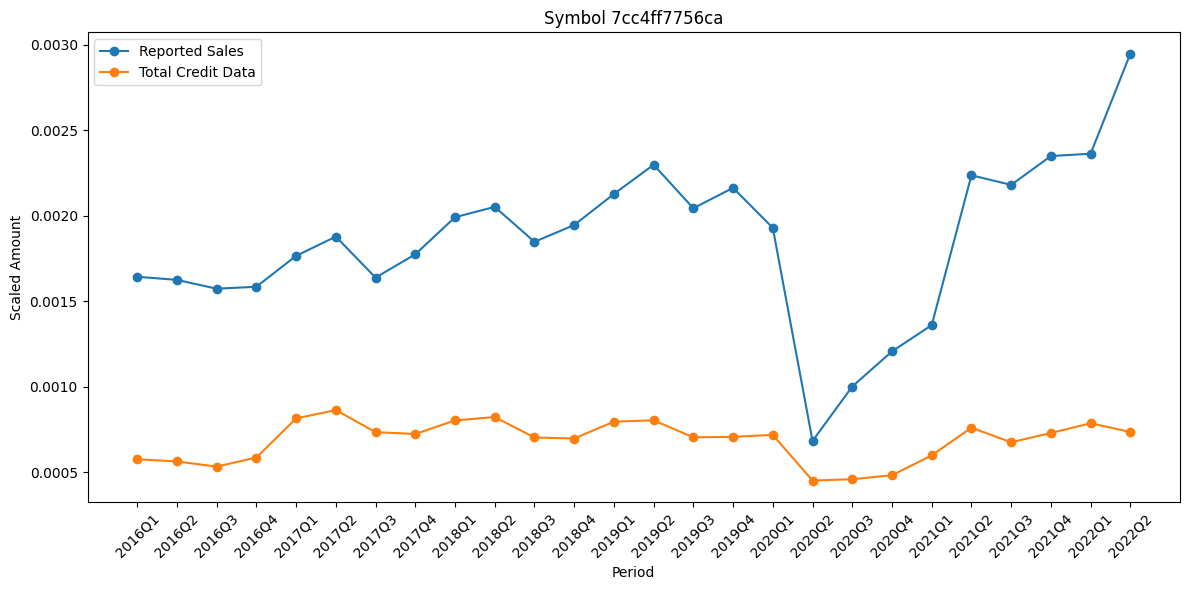

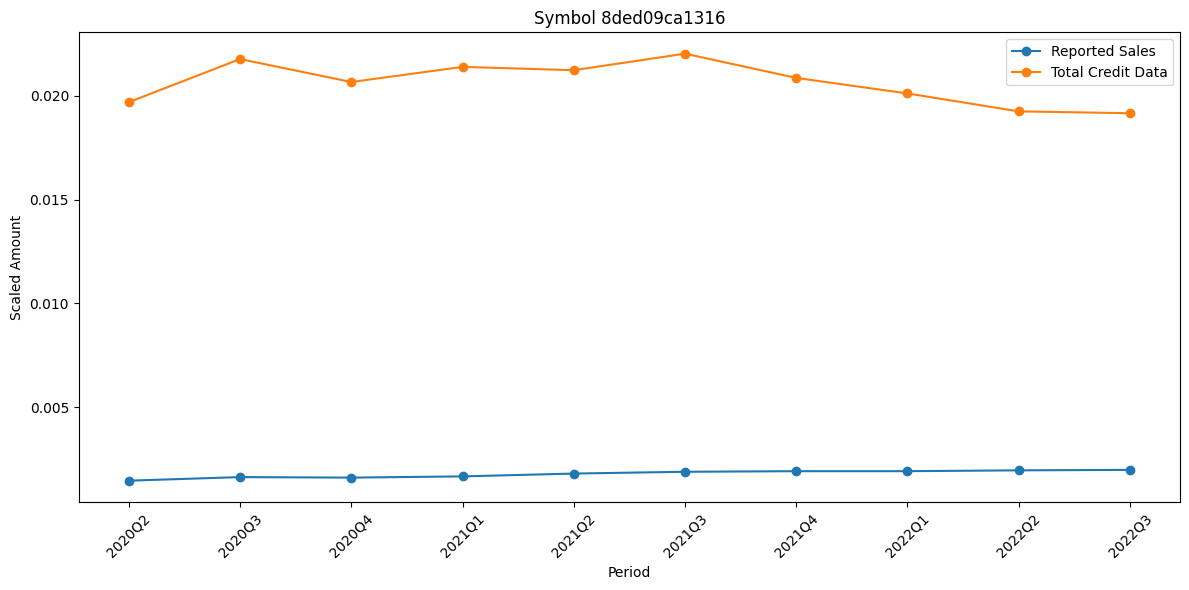

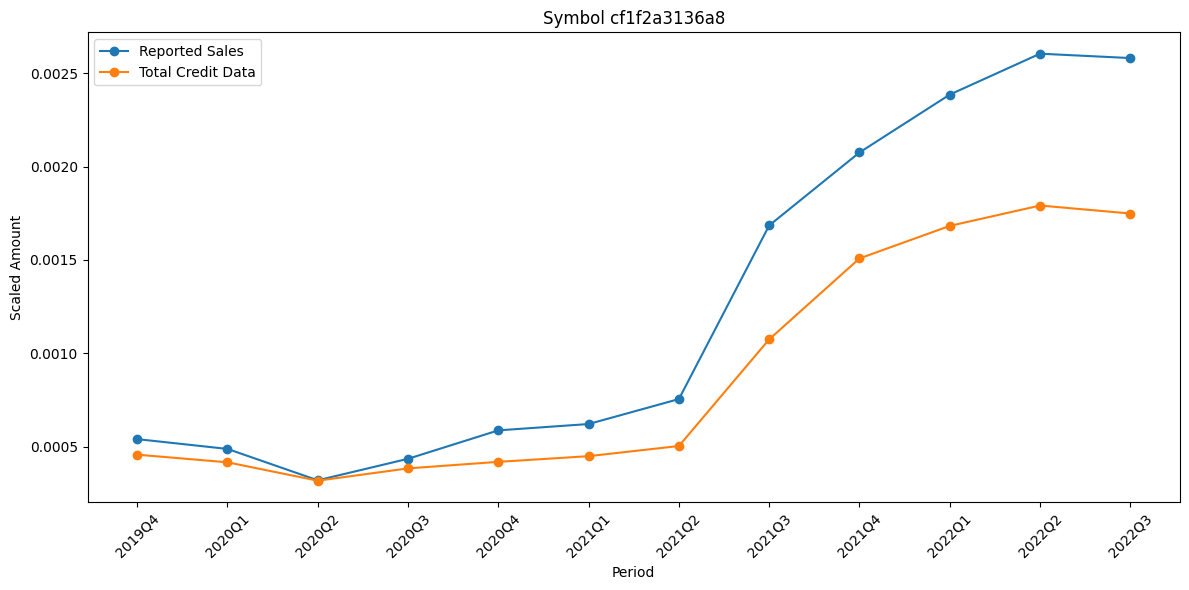

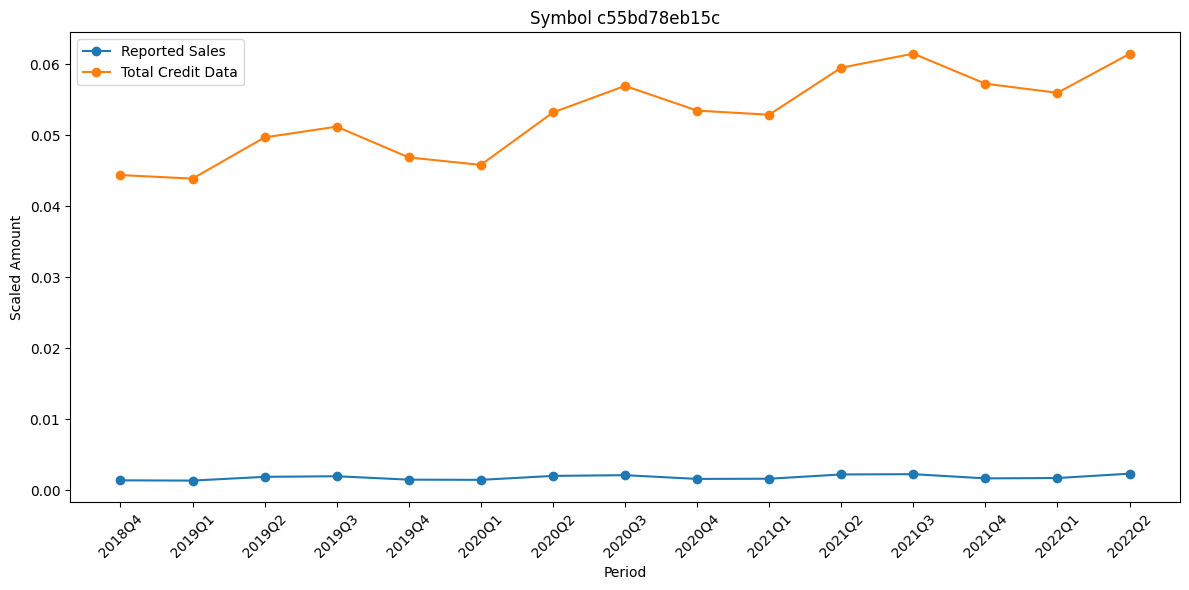

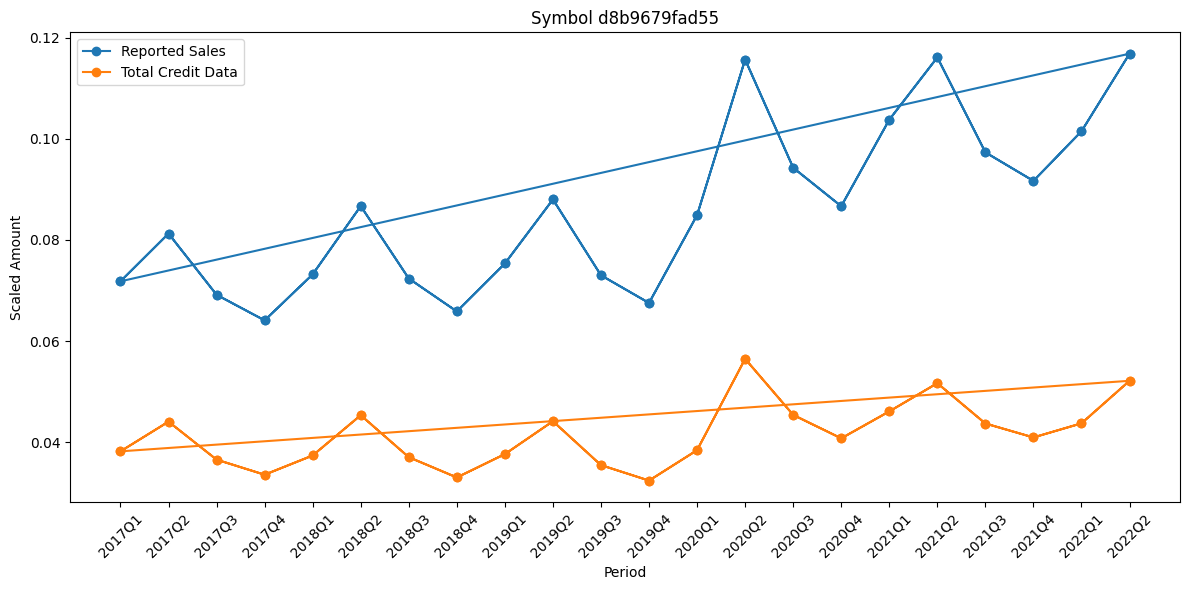

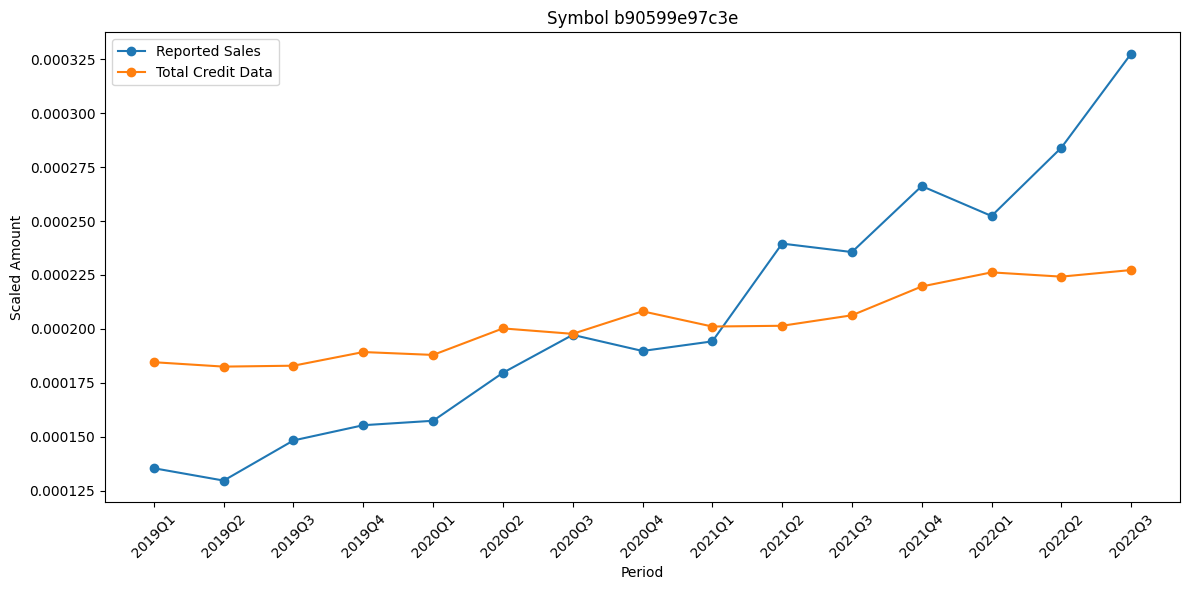

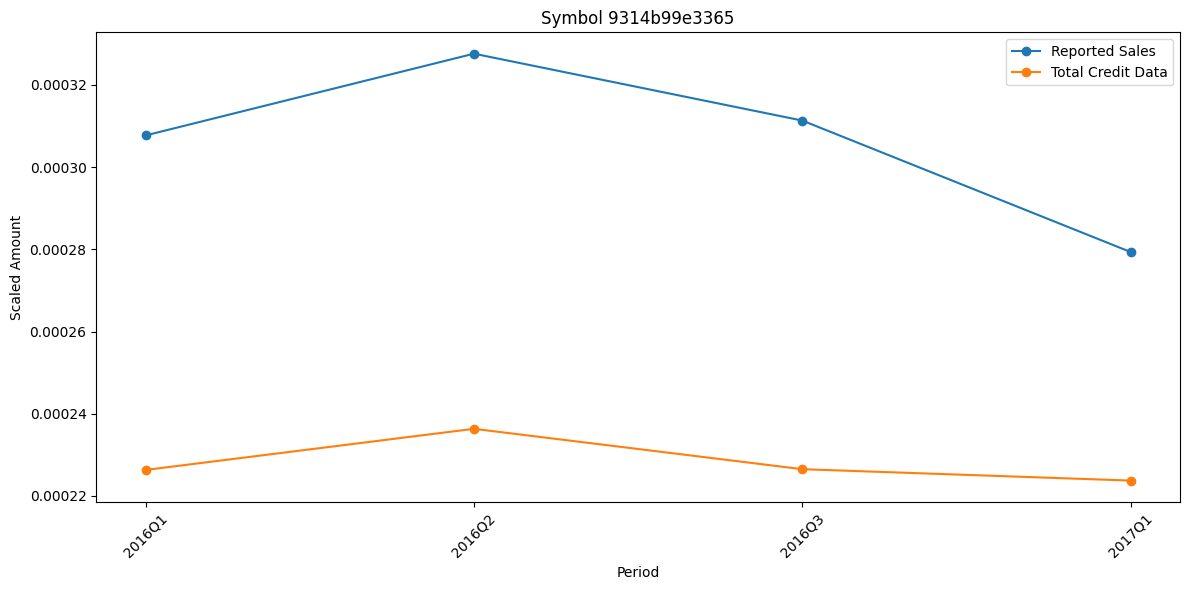

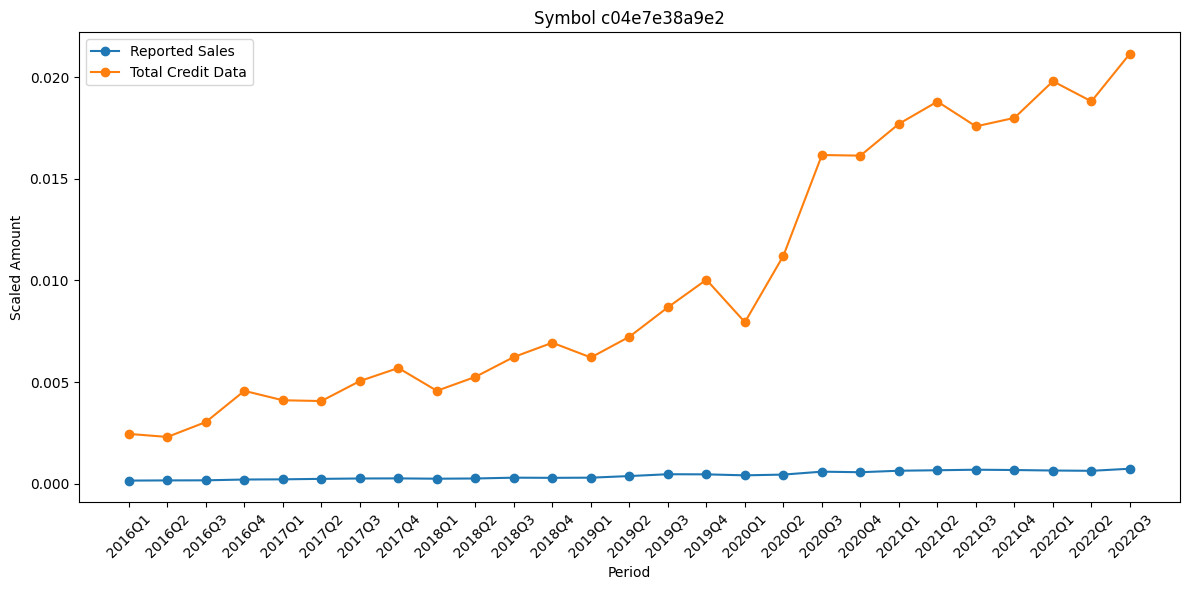

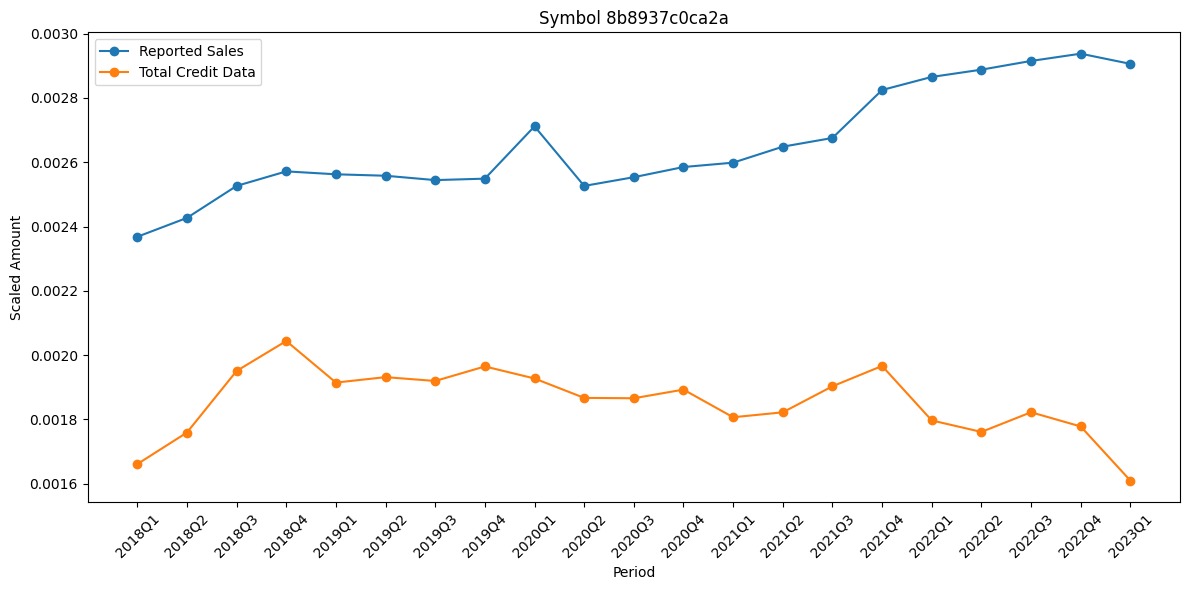

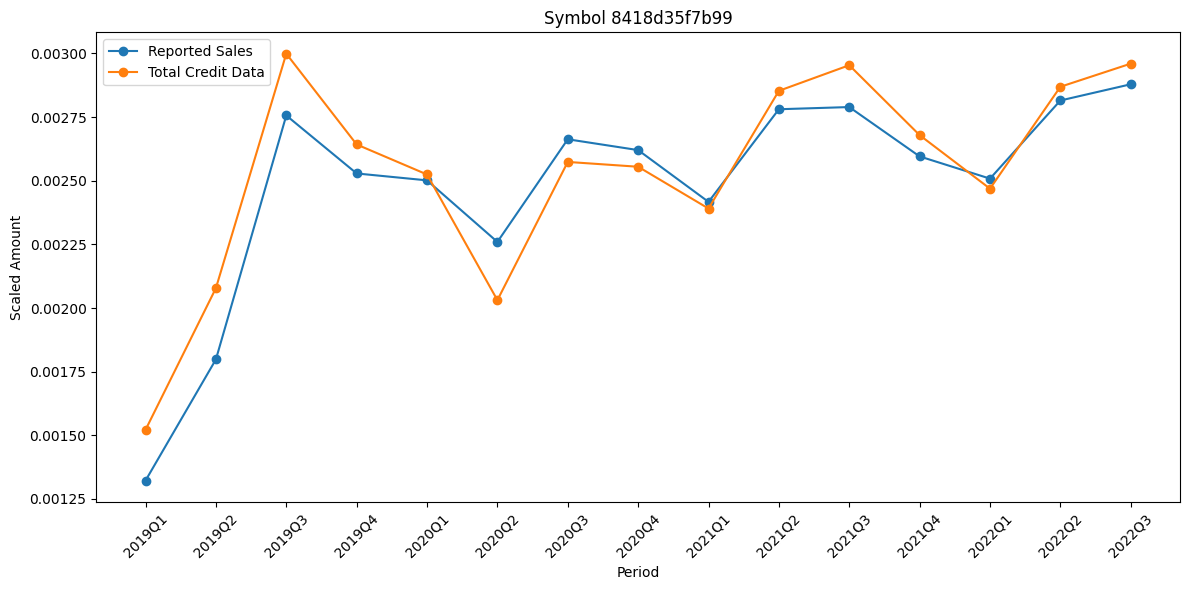

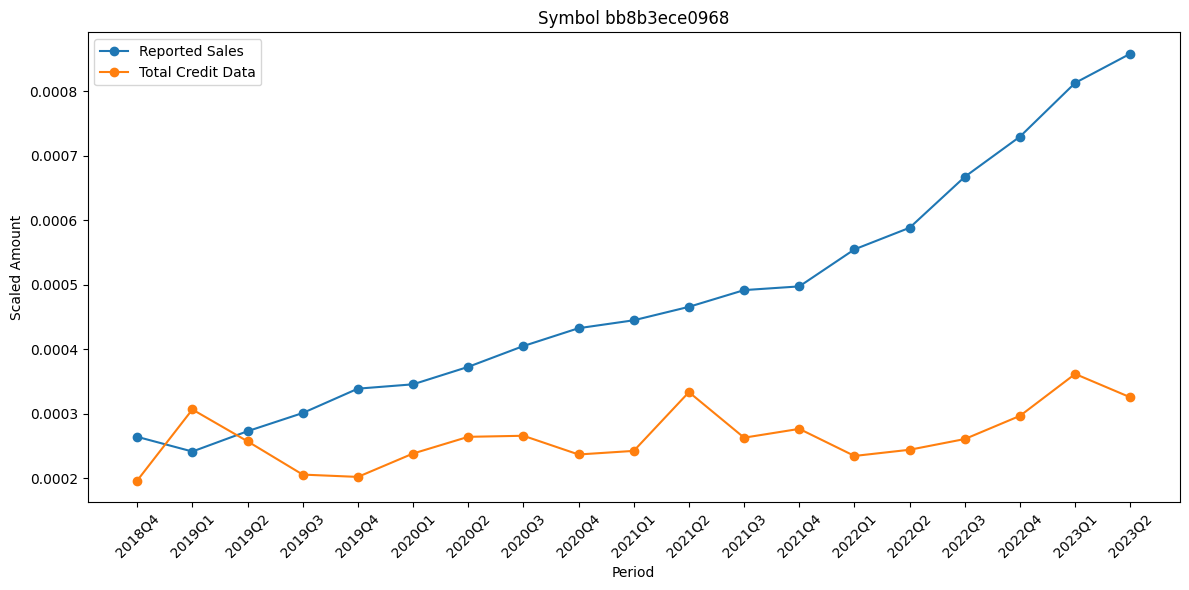

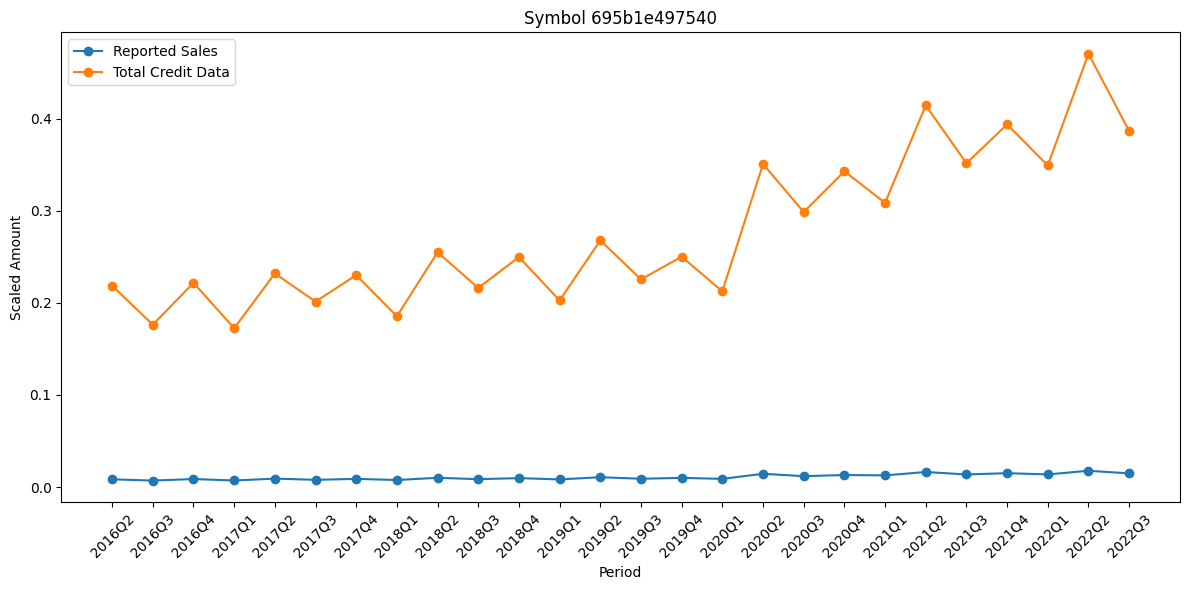

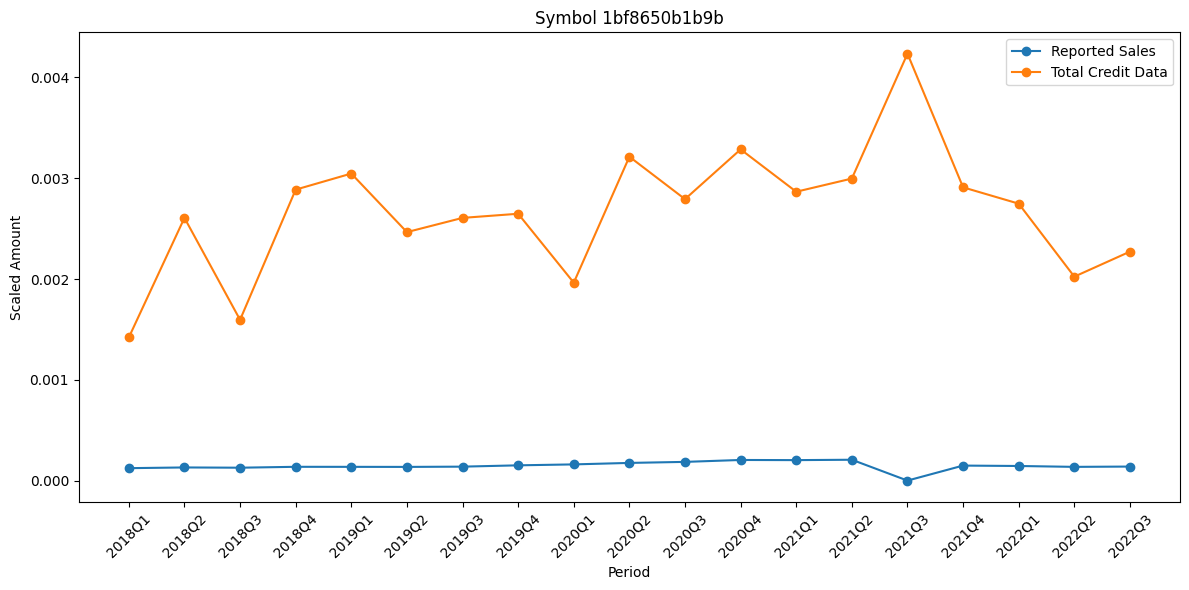

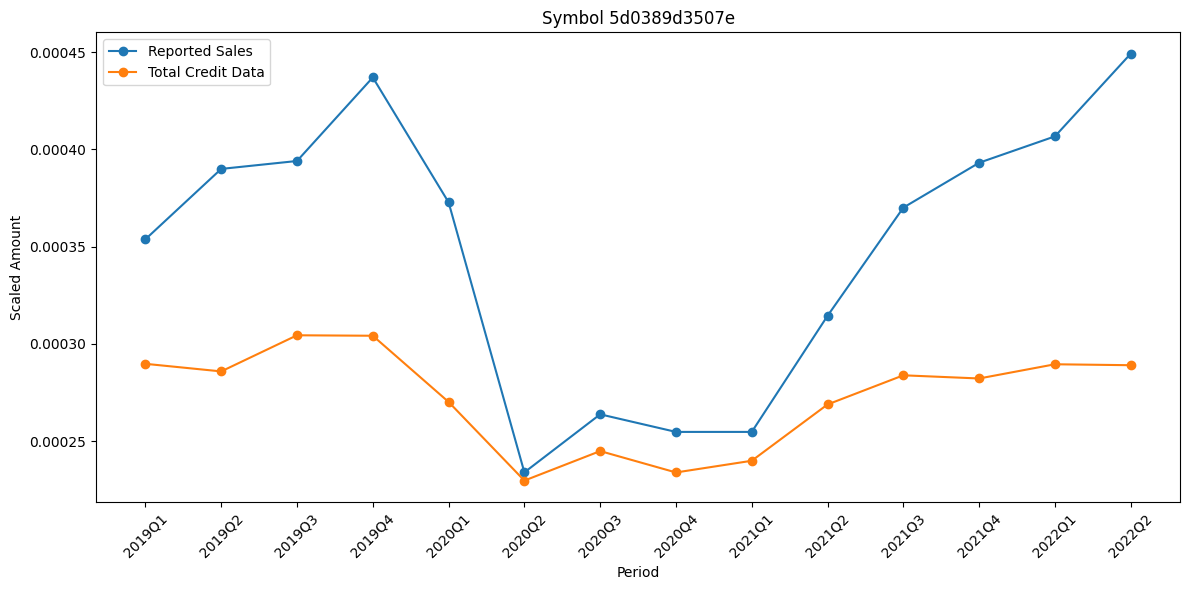

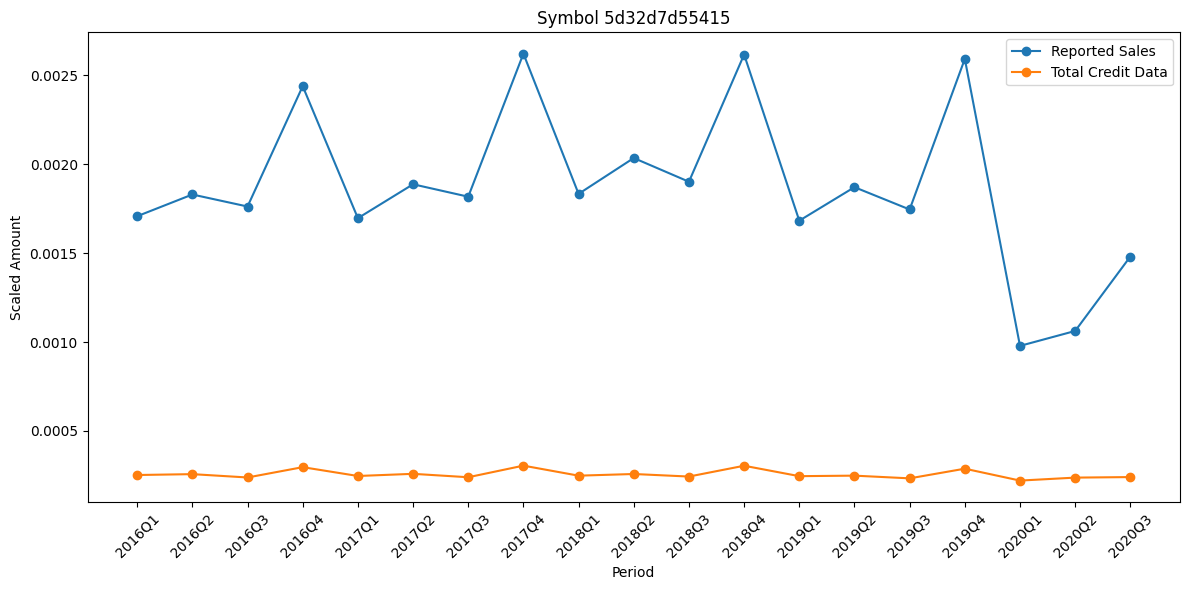

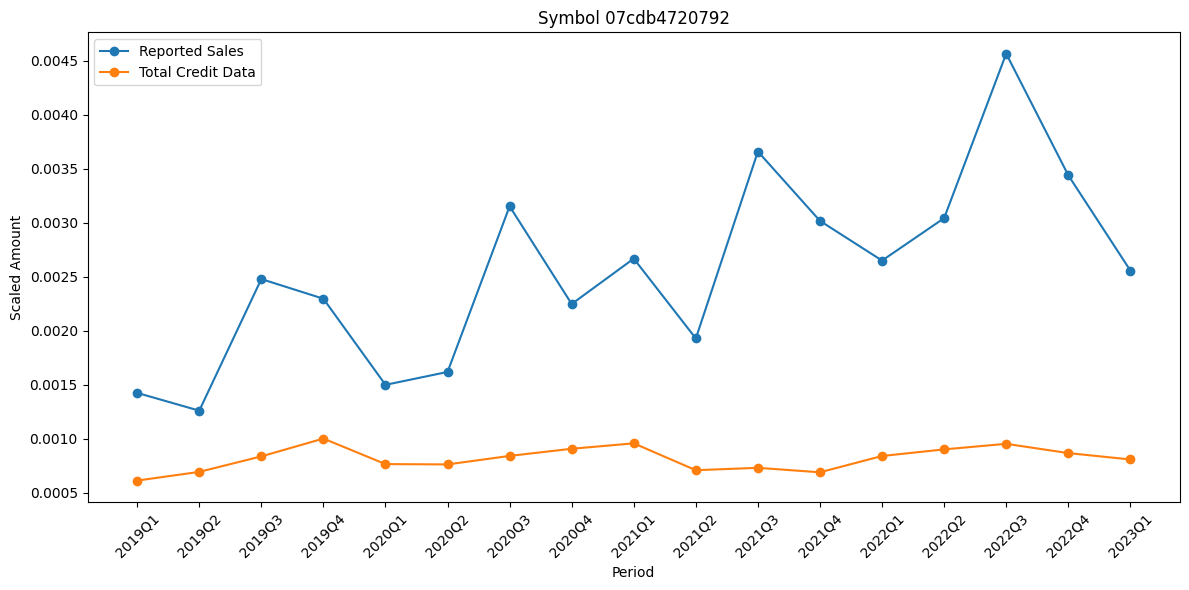

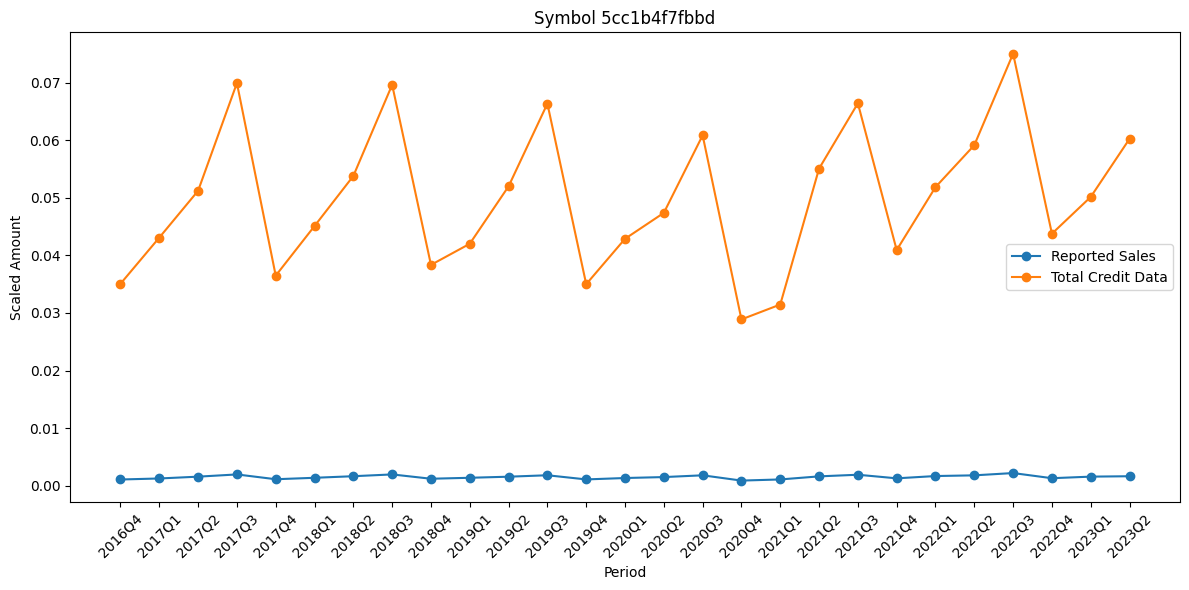

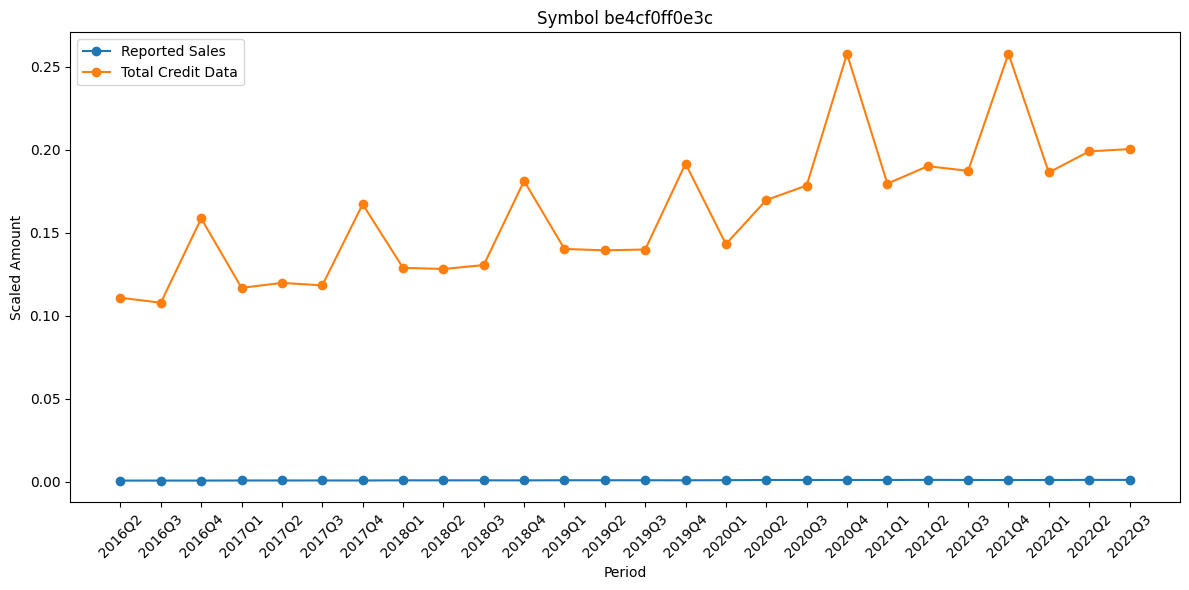

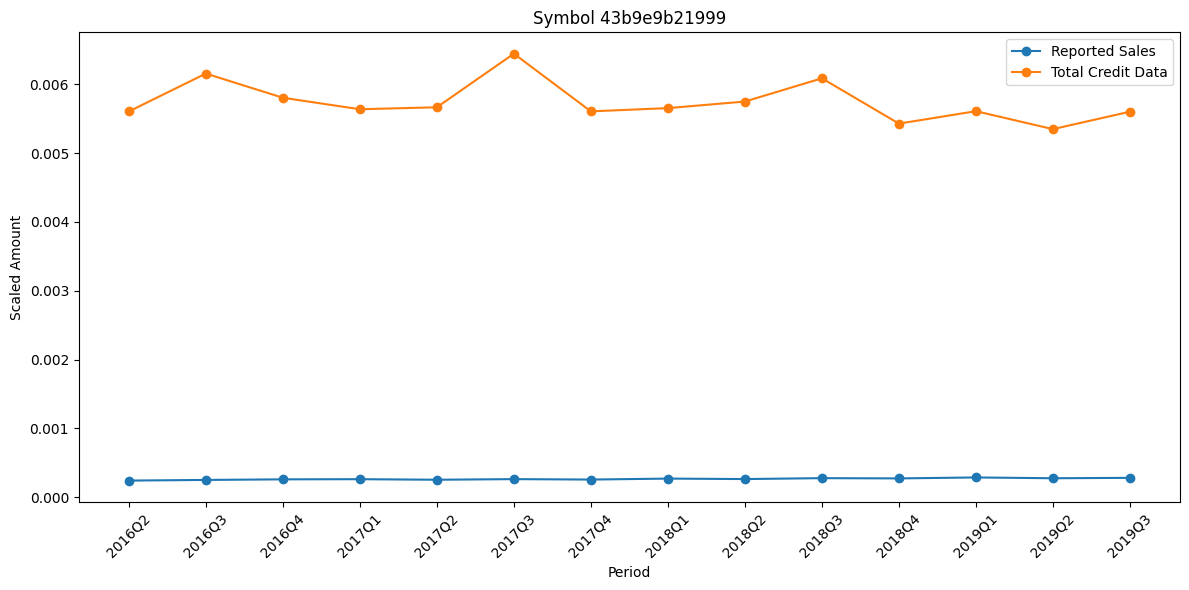

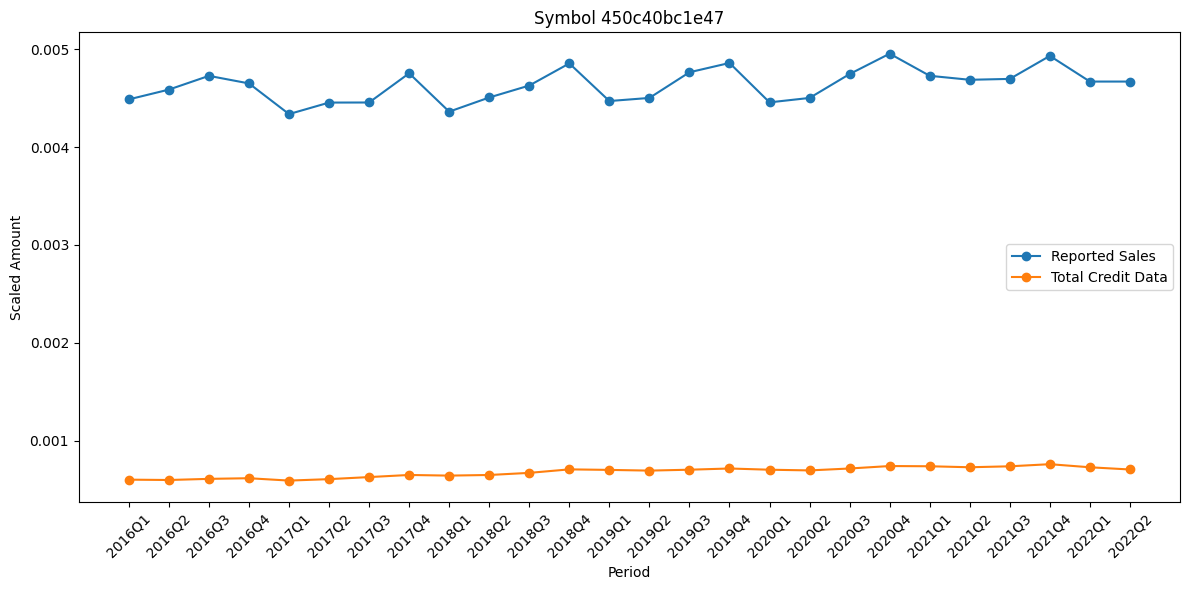

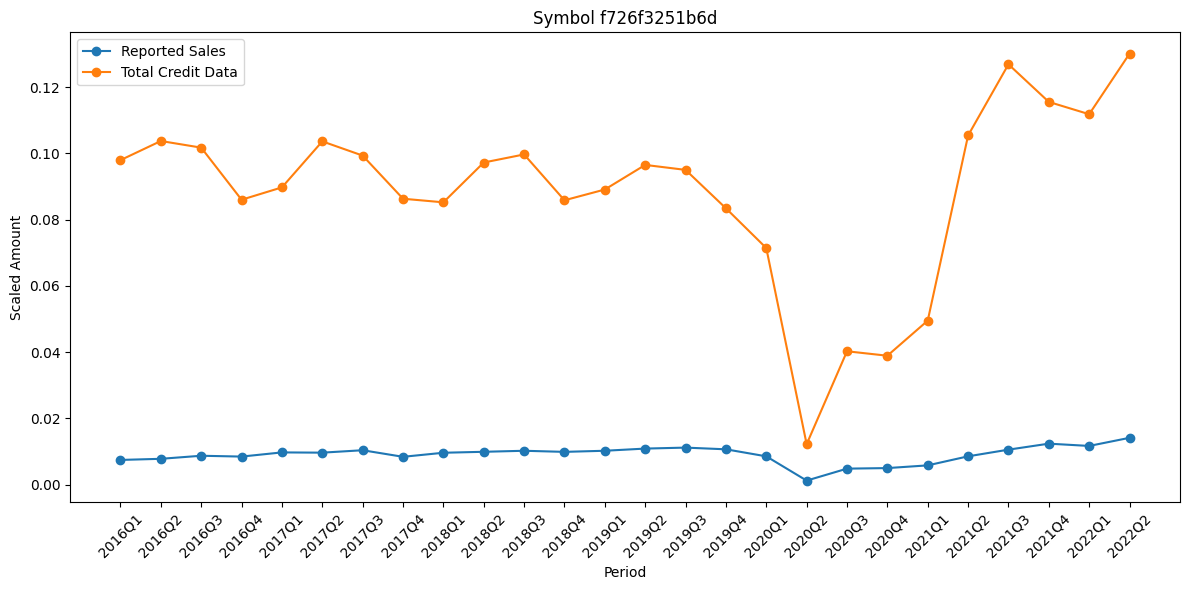

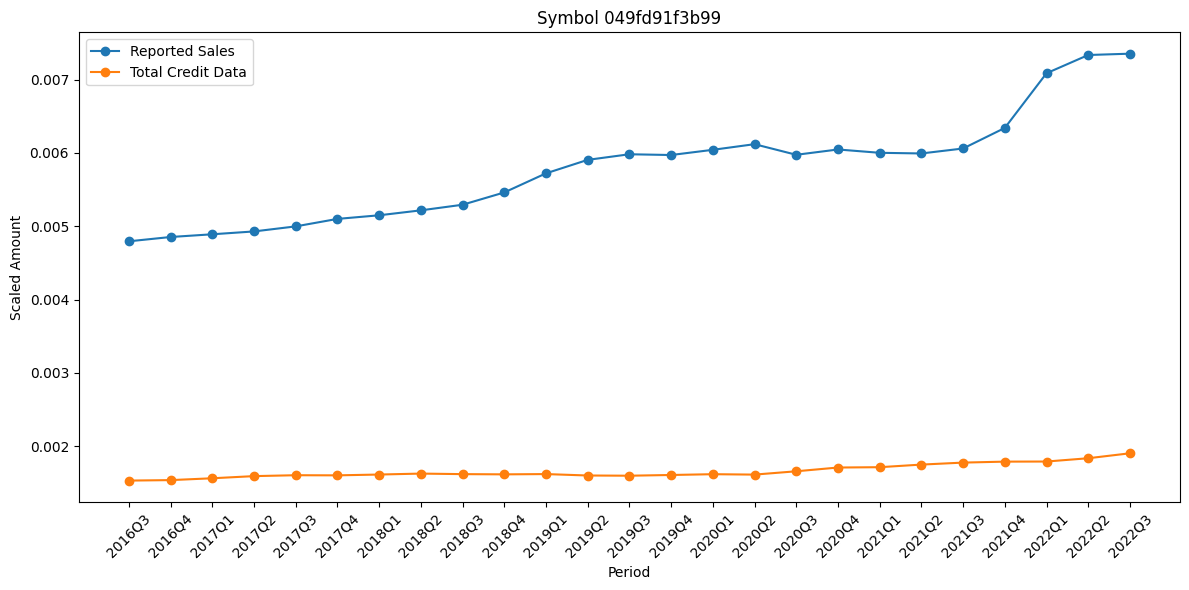

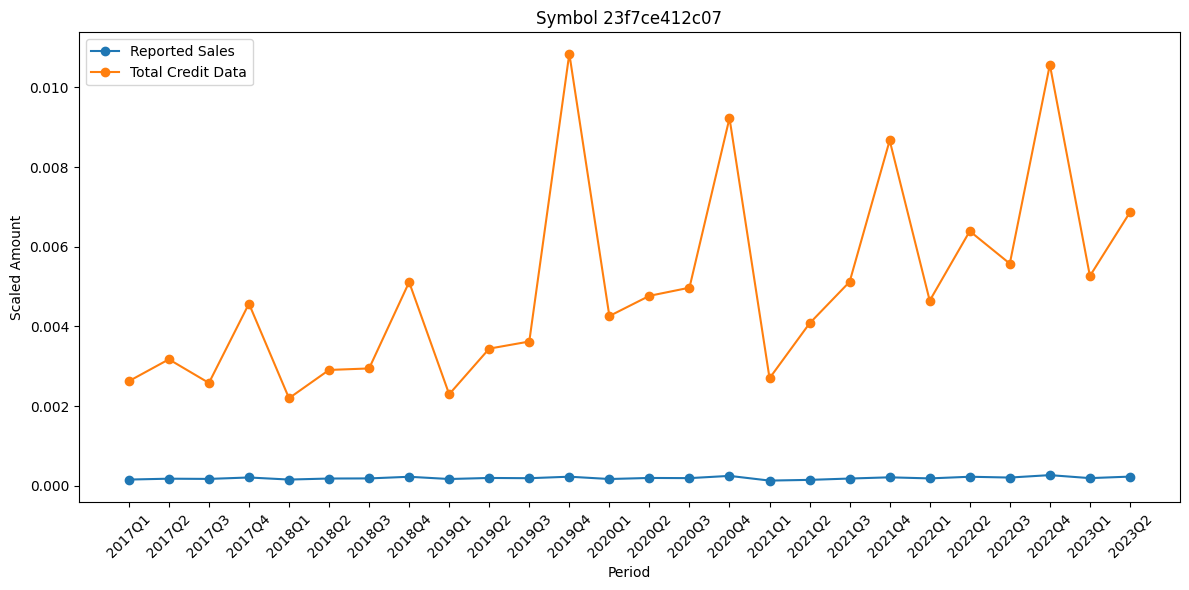

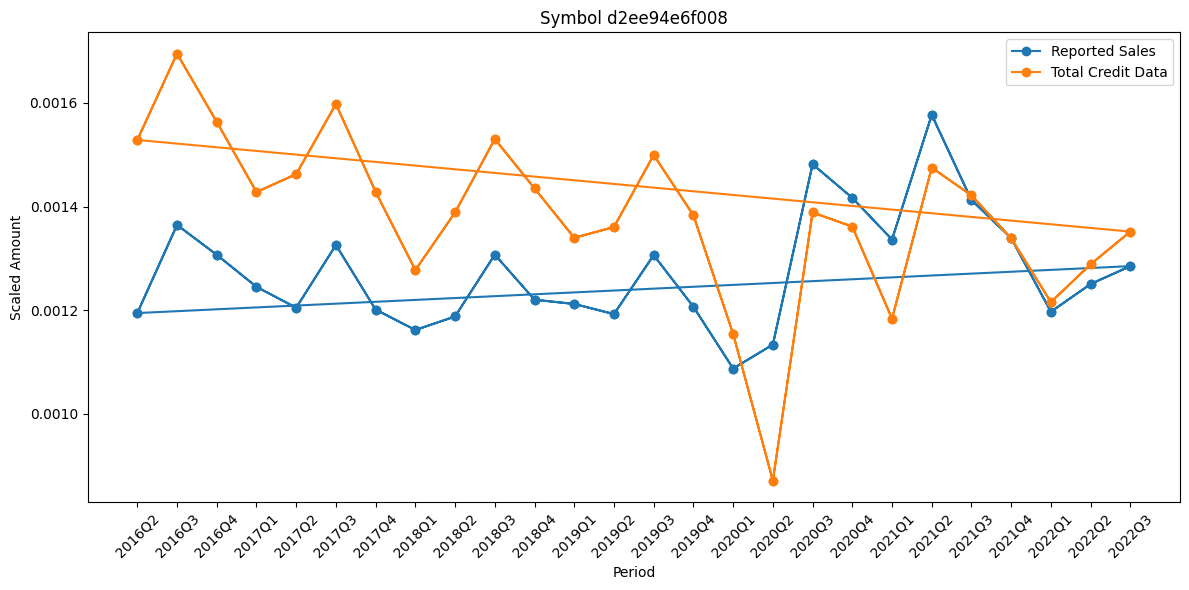

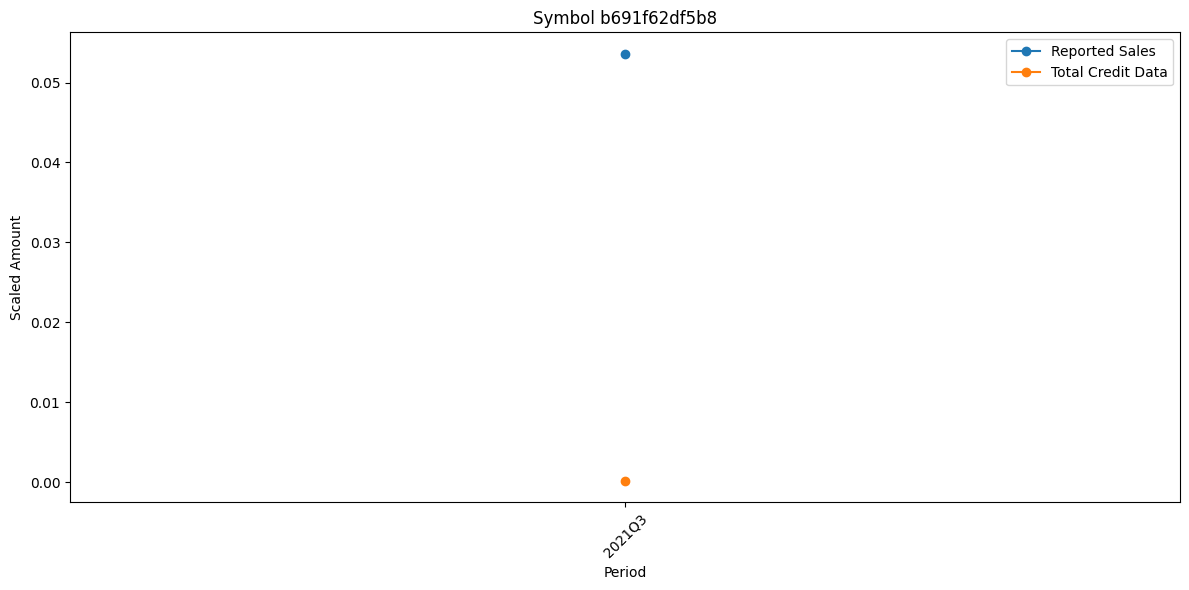

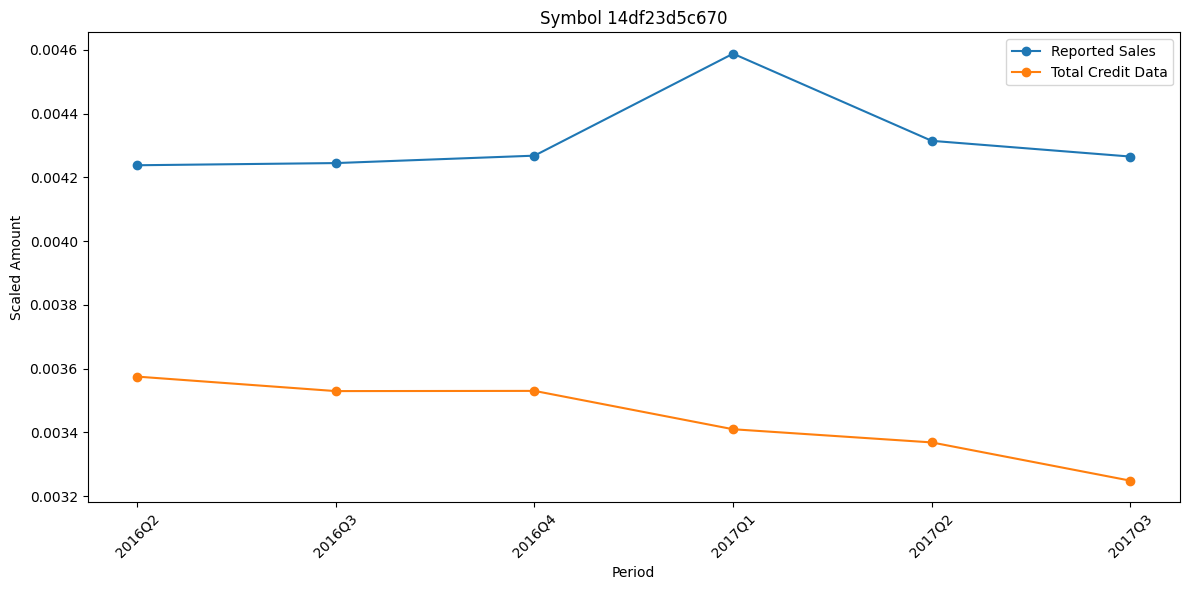

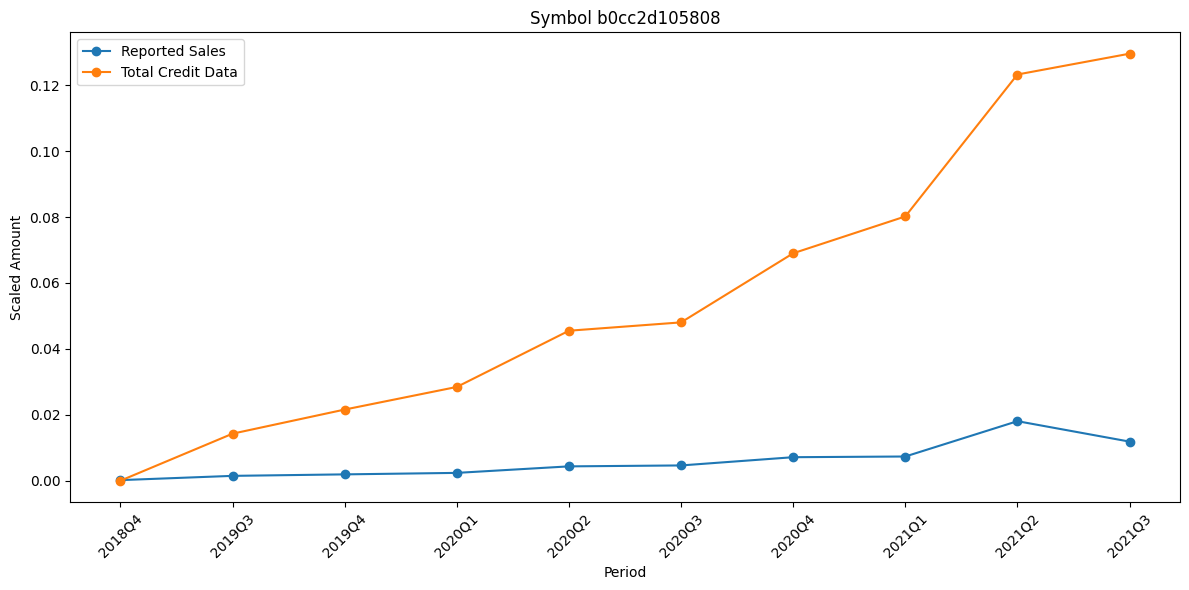

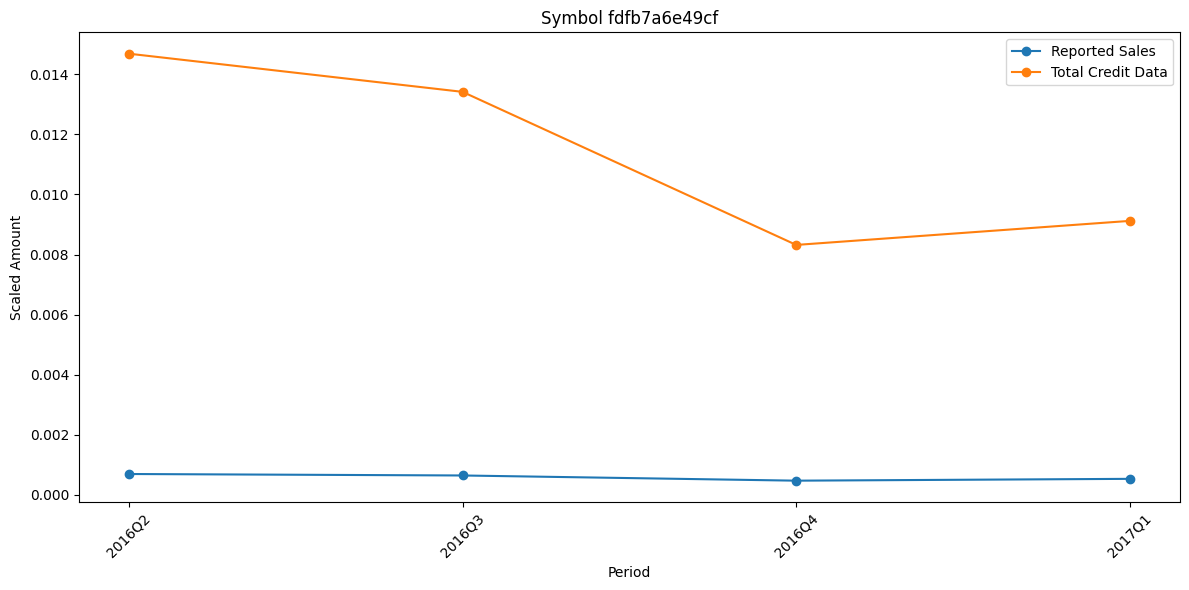

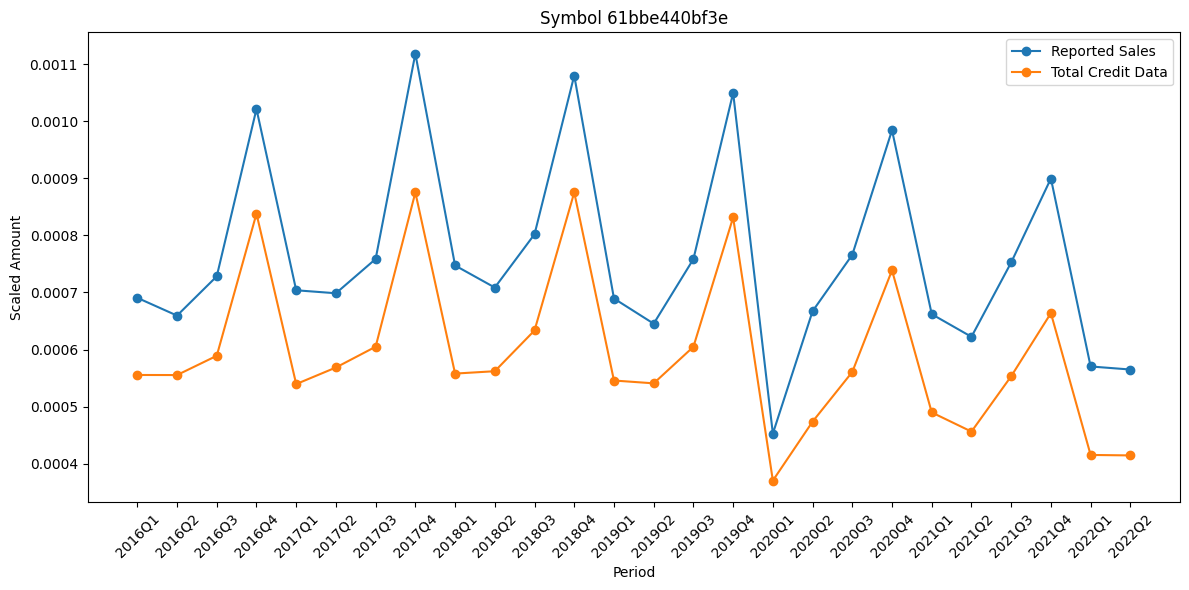

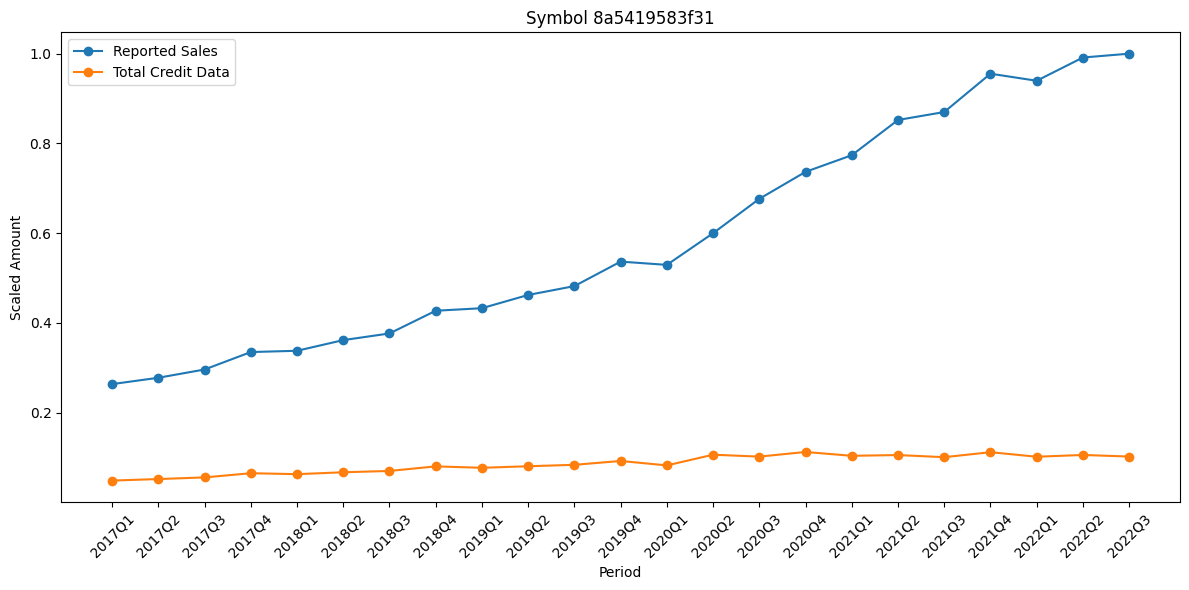

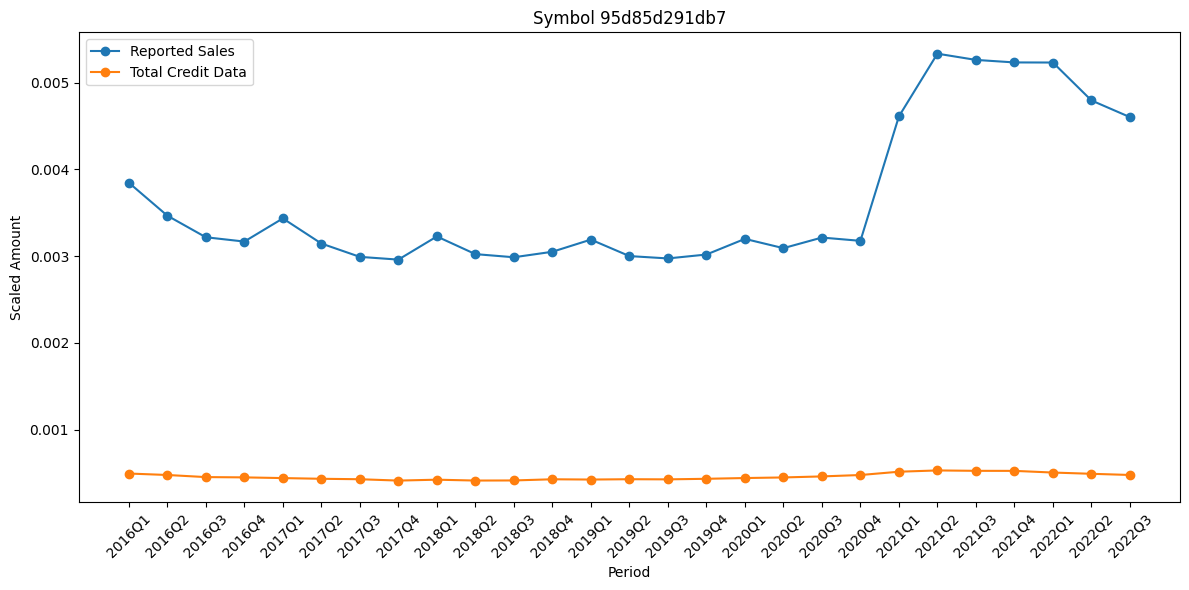

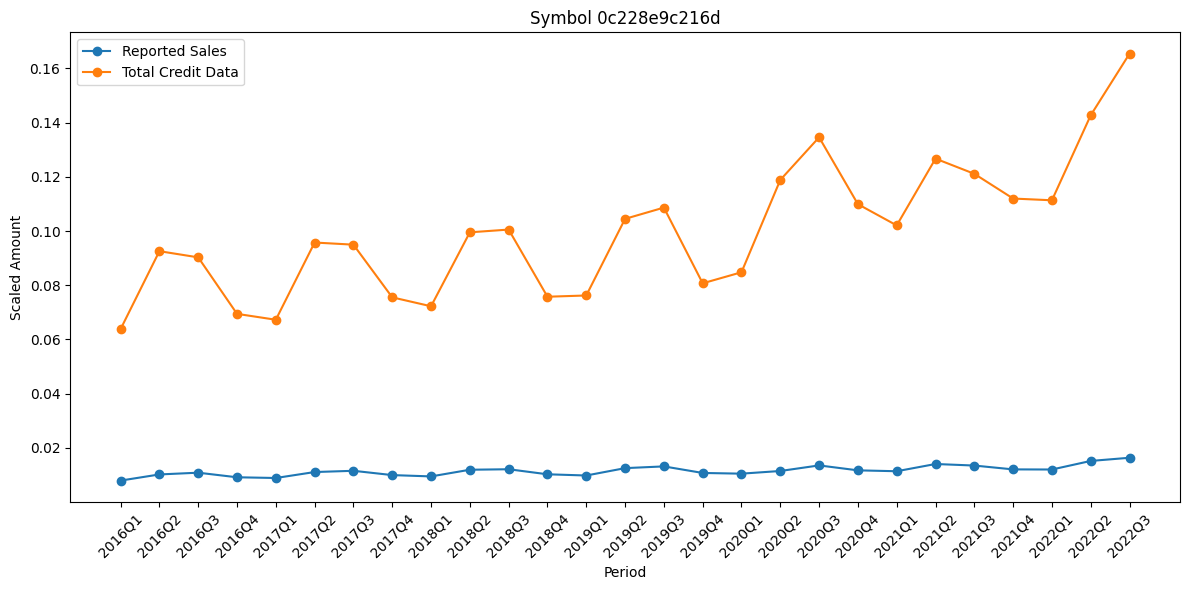

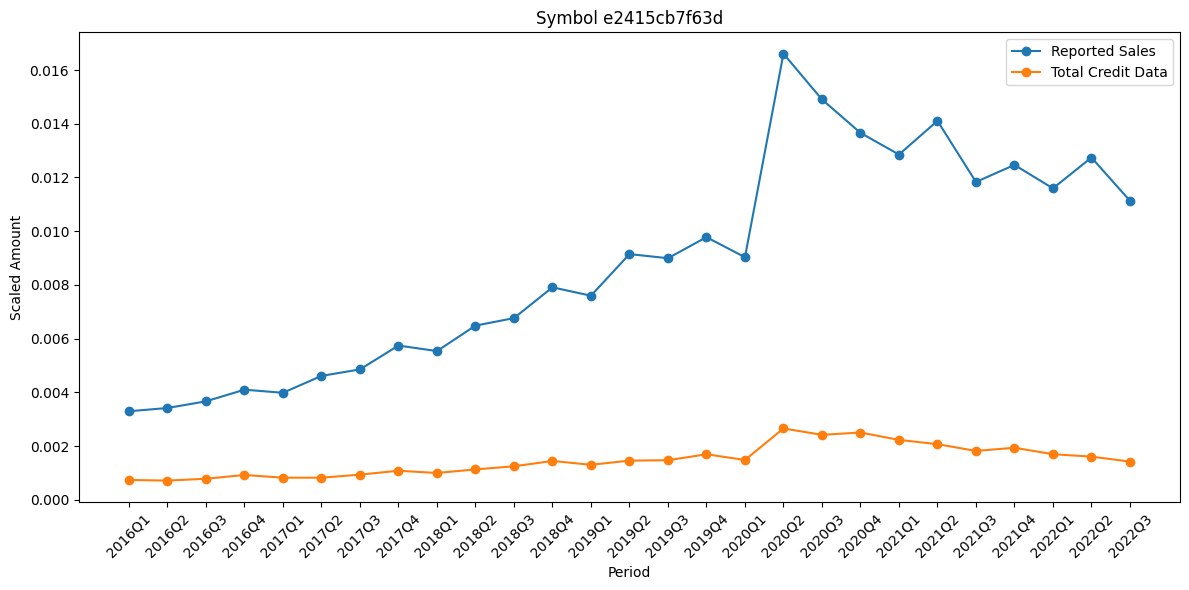

           symbol  period  reported_sales  total_credit_data
0    ef1bcca724f3  2016Q4        0.008196           0.226494
1    ef1bcca724f3  2017Q1        0.007853           0.222173
2    ef1bcca724f3  2017Q2        0.007528           0.205197
3    ef1bcca724f3  2017Q3        0.008596           0.221414
4    ef1bcca724f3  2017Q4        0.008848           0.231712
..            ...     ...             ...                ...
776  e2415cb7f63d  2021Q3        0.011834           0.001818
777  e2415cb7f63d  2021Q4        0.012467           0.001935
778  e2415cb7f63d  2022Q1        0.011594           0.001695
779  e2415cb7f63d  2022Q2        0.012742           0.001605
780  e2415cb7f63d  2022Q3        0.011133           0.001421

[781 rows x 4 columns]


<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

            symbol  period reported_sales  total_credit_data
0     9314b99e3365  2016Q1           45.2        4321.065685
1     9314b99e3365  2016Q2           49.6        4849.548822
2     9314b99e3365  2016Q3           46.0        4849.123698
3     9314b99e3365  2016Q4           None        7985.901245
4     9314b99e3365  2017Q1         38.924        3889.856357
...            ...     ...            ...                ...
1305  bb8b3ece0968  2021Q4      138.57324        9162.831969
1306  bb8b3ece0968  2022Q1      156.99585       14392.184365
1307  bb8b3ece0968  2022Q2        167.013       16590.858172
1308  bb8b3ece0968  2022Q3           None       14090.153129
1309  bb8b3ece0968  2022Q4           None       11951.630193

[1310 rows x 4 columns]


<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._result = self._result.append({
<ipython-input-1-ebb8227a5c12>:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [ ]:
# Required Libraries in Alphabetical Order
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# First class: DataProcessor
class DataProcessor:
    def __init__(self, credit_path, sales_path):
        # Load credit and sales data
        self._credit = self._load_data(credit_path, 'credit')
        self._sales = self._load_data(sales_path, 'sales')
        # Initialize an empty DataFrame to store results
        self._result = pd.DataFrame()

    def _load_data(self, path, dtype):
        """
        Load and preprocess data based on the data type.
        dtype can be either 'credit' or 'sales'.
        """
        data = pd.read_csv(path)
        if dtype == 'credit':
            # Rename the first column to match 'symbol' and convert dates
            data.rename(columns={data.columns[0]: 'symbol'}, inplace=True)
            data['trans_date'] = pd.to_datetime(data['trans_date'])
        elif dtype == 'sales':
            # Convert period start and end dates to datetime format
            data['period_start_dt'] = pd.to_datetime(data['period_start_dt'])
            data['ptd_end_dt'] = pd.to_datetime(data['ptd_end_dt'])
        return data

    def process_data(self):
        """
        Process the data to match sales with the corresponding credit data.
        It loops through each symbol and period in the sales data.
        """
        for symbol in self._sales['symbol'].unique():
            sales_subset = self._sales[self._sales['symbol'] == symbol]
            credit_subset = self._credit[self._credit['symbol'] == symbol]
            for _, row in sales_subset.iterrows():
                credit_data_within_period = credit_subset[
                    (credit_subset['trans_date'] >= row['period_start_dt']) &
                    (credit_subset['trans_date'] <= row['ptd_end_dt'])]
                total_credit_data = credit_data_within_period['data'].sum()
                self._result = self._result.append({
                    'symbol': symbol,
                    'period': row['period'],
                    'reported_sales': row['reported_sales'],
                    'total_credit_data': total_credit_data
                }, ignore_index=True)

    def scale_data(self):
        """
        Scale the 'reported_sales' and 'total_credit_data' columns
        to fit between 0 and 1.
        """
        scaler = MinMaxScaler()
        self._result[['reported_sales', 'total_credit_data']] = scaler.fit_transform(
            self._result[['reported_sales', 'total_credit_data']])

    def plot_data(self):
        """Visualize the scaled data for each symbol."""
        for symbol in self._result['symbol'].unique():
            subset = self._result[self._result['symbol'] == symbol]
            plt.figure(figsize=(12, 6))
            plt.plot(subset['period'], subset['reported_sales'], marker='o', label='Reported Sales')
            plt.plot(subset['period'], subset['total_credit_data'], marker='o', label='Total Credit Data')
            plt.title(f"Symbol {symbol}")
            plt.xlabel('Period')
            plt.ylabel('Scaled Amount')
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    def get_result(self):
        """Return the processed results."""
        return self._result

# Second class: DataProcessorV2
class DataProcessorV2:
    def __init__(self, credit_path, sales_path):
        # Load credit and sales data
        self._credit = self._load_data(credit_path, 'credit')
        self._sales = self._load_data(sales_path, 'sales')
        # Initialize an empty DataFrame to store results
        self._result = pd.DataFrame()

    def _load_data(self, path, dtype):
        """Same loading function as in DataProcessor."""
        data = pd.read_csv(path)
        if dtype == 'credit':
            data.rename(columns={data.columns[0]: 'symbol'}, inplace=True)
            data['trans_date'] = pd.to_datetime(data['trans_date'])
        elif dtype == 'sales':
            data['period_start_dt'] = pd.to_datetime(data['period_start_dt'])
            data['ptd_end_dt'] = pd.to_datetime(data['ptd_end_dt'])
        return data

    def process_data(self):
        """
        Process the data to match all credit data even where there is no
        corresponding sales data. It loops through each symbol and quarter.
        """
        all_symbols = set(self._credit['symbol'].unique()).union(set(self._sales['symbol'].unique()))
        for symbol in all_symbols:
            sales_subset = self._sales[self._sales['symbol'] == symbol]
            credit_subset = self._credit[self._credit['symbol'] == symbol]
            for quarter, quarter_credit_data in credit_subset.groupby(credit_subset['trans_date'].dt.to_period('Q')):
                quarter_start = pd.Period(quarter, freq='Q').start_time
                quarter_end = pd.Period(quarter, freq='Q').end_time
                sales_data_in_quarter = sales_subset[
                    (sales_subset['period_start_dt'] >= quarter_start) &
                    (sales_subset['period_start_dt'] <= quarter_end)]
                if not sales_data_in_quarter.empty:
                    reported_sales = sales_data_in_quarter['reported_sales'].values[0]
                else:
                    reported_sales = None
                total_credit_data = quarter_credit_data['data'].sum()
                self._result = self._result.append({
                    'symbol': symbol,
                    'period': quarter,
                    'reported_sales': reported_sales,
                    'total_credit_data': total_credit_data
                }, ignore_index=True)

    def get_result(self):
        """Return the processed results."""
        return self._result

# Note: To load the credit data, either specify the local path or include the path where it's stored.

credit_path = 'data4columbia_credit.csv'
sales_path = 'data4columbia_sales.csv'

dp = DataProcessor(credit_path, sales_path)
dp.process_data()
dp.scale_data()
dp.plot_data()
print(dp.get_result())

dpv2 = DataProcessorV2(credit_path, sales_path)
dpv2.process_data()
print(dpv2.get_result())